# Juega con los parámetros

Hay varios parámetros que están configurados de forma predeterminada cuando usas estos clasificadores. Intellisense en VS Code puede ayudarte a profundizar en ellos. Adopta una de las técnicas de clasificación de aprendizaje automático de esta lección y vuelve a entrenar los modelos ajustando varios valores de parámetros. Construye un notebook explicando por qué algunos cambios mejoran la calidad del modelo mientras otros la degradan. Sé minucioso en tu respuesta.

## Tecnica de clasificacion: K-Neighbors
Se utilizara la técnica de clasificación K-Neighbors para etiquetar los datos de accidentes automovilísticos como el tipo de lesión, pero antes necesitamos preparar los datos y luego aplicar el algoritmo K-Neighbors. 

In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

1. Cargar los datos desde un DataFrame

In [2]:
df = pd.read_excel('../data/new_dataset.xlsx')
df

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625
...,...,...,...,...,...,...,...,...,...,...,...
53938,2003,10,6,Weekday,1700.0,2-Car,No injury/unknown,IMPROPER LANE USAGE,DUNN & WHITE LOT WEST,0.000000,0.000000
53939,2003,11,3,Weekday,800.0,1-Car,No injury/unknown,UNSAFE SPEED,RED OAK & SR446,0.000000,0.000000
53940,2003,12,5,Weekday,1200.0,2-Car,No injury/unknown,BRAKE FAILURE OR DEFECTIVE,2ND ST & WALNUT,0.000000,0.000000
53941,2003,12,1,Weekend,700.0,2-Car,No injury/unknown,UNSAFE BACKING,NINETH & NORTH,0.000000,0.000000


2. Vamos ver la informacion de nuestros datos

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               53943 non-null  int64  
 1   Month              53943 non-null  int64  
 2   Day                53943 non-null  int64  
 3   Weekend?           53943 non-null  int32  
 4   Hour               53943 non-null  object 
 5   Collision Type     53943 non-null  int32  
 6   Injury Type        53943 non-null  int32  
 7   Primary Factor     53943 non-null  int32  
 8   Reported_Location  53943 non-null  int32  
 9   Latitude           53943 non-null  object 
 10  Longitude          53913 non-null  float64
dtypes: float64(1), int32(5), int64(3), object(2)
memory usage: 3.5+ MB


3. Ahora codificamos las variables categóricas si es necesario

In [13]:
# Convertir la columna 'Hour' a cadena
df['Weekend?'] = df['Weekend?'].astype(str)
df['Collision Type'] = df['Collision Type'].astype(str)
df['Injury Type'] = df['Injury Type'].astype(str)
df['Primary Factor'] = df['Primary Factor'].astype(str)
df['Reported_Location'] = df['Reported_Location'].astype(str)

# Aplicar LabelEncoder a las columnas categóricas
label_encoders = {}
categorical_columns = ['Weekend?', 'Collision Type', 'Injury Type', 'Primary Factor', 'Reported_Location']

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

4. Dividir los datos en conjuntos de entrenamiento y prueba

In [18]:
X = df.drop(columns=['Month'])
y = df['Month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5. Entrenar el modelo K-Neighbors.

In [21]:
from sklearn.impute import SimpleImputer

# Crear un imputador para rellenar los valores faltantes con la media
imputer = SimpleImputer(strategy='mean')

# Aplicar el imputador a los datos de entrenamiento
X_train_imputed = imputer.fit_transform(X_train)

# Entrenar el modelo K-Neighbors con los datos imputados
knn.fit(X_train_imputed, y_train)

KNeighborsClassifier()

5. Inicializar y entrenar el clasificador K-Neighbors

In [48]:
# Inicializar el clasificador K-Neighbors
knn = KNeighborsClassifier(n_neighbors=5)

from sklearn.impute import SimpleImputer

# Crear un imputador con estrategia de imputación (por ejemplo, usando la mediana)
imputer = SimpleImputer(strategy='median')

# Entrenar el imputador en los datos de entrenamiento
imputer.fit(X_train)

# Aplicar la imputación a los conjuntos de entrenamiento y prueba
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Ahora puedes continuar con el entrenamiento del clasificador utilizando los datos imputados
knn.fit(X_train_imputed, y_train)

KNeighborsClassifier()

6. Ahora vamos a Evaluar el modelo

In [26]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report

# Crear un imputador para rellenar los valores faltantes con la media
imputer = SimpleImputer(strategy='mean')

# Aplicar el imputador a los datos de prueba
X_test_imputed = imputer.fit_transform(X_test)

# Evaluar el modelo con los datos de prueba imputados
y_pred = knn.predict(X_test_imputed)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.08814533320975067
              precision    recall  f1-score   support

           1       0.09      0.24      0.13       932
           2       0.09      0.16      0.11       907
           3       0.07      0.10      0.09       759
           4       0.08      0.10      0.09       853
           5       0.08      0.07      0.07       865
           6       0.08      0.05      0.06       749
           7       0.06      0.03      0.04       749
           8       0.08      0.04      0.06       912
           9       0.07      0.05      0.06      1005
          10       0.12      0.09      0.10      1101
          11       0.12      0.07      0.09       986
          12       0.10      0.05      0.07       971

    accuracy                           0.09     10789
   macro avg       0.09      0.09      0.08     10789
weighted avg       0.09      0.09      0.08     10789



7. Para probar este modelo podemos hacer algún tipo de prediccion como predecir el día en el que sucedió el accidente

In [34]:
nuevos_datos = pd.DataFrame({
    'Year': [2017],
    'Month': [6],
    'Day': [1],  # Esto puede ser cualquier valor inicial, ya que lo estamos prediciend
    'Hour': [1200.0],  # Suponiendo que es al mediodía
    'Collision Type': [2],
    'Injury Type': [3],
    'Primary Factor': [5],
    'Reported_Location': [6],
    'Latitude': [39.149780],
    'Longitude': [-86.568890]
})

# Hacer predicciones utilizando el modelo K-Neighbors
dia_predicho = knn.predict(nuevos_datos)

# El día predicho contendrá el día estimado en el que ocurrió el accidente
print("Día predicho del accidente:", dia_predicho)

Día predicho del accidente: [7]


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


8. El modelo predice que este accidente sucedio en el dia 7 osea en sabado.

In [49]:
# Aplicar la imputación a los conjuntos de entrenamiento y prueba
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Ahora puedes realizar la predicción con el clasificador K-Neighbors
y_pred = knn.predict(X_test_imputed)

9. Por ultimo imprimimos una representacion visual de la matriz de confucion.

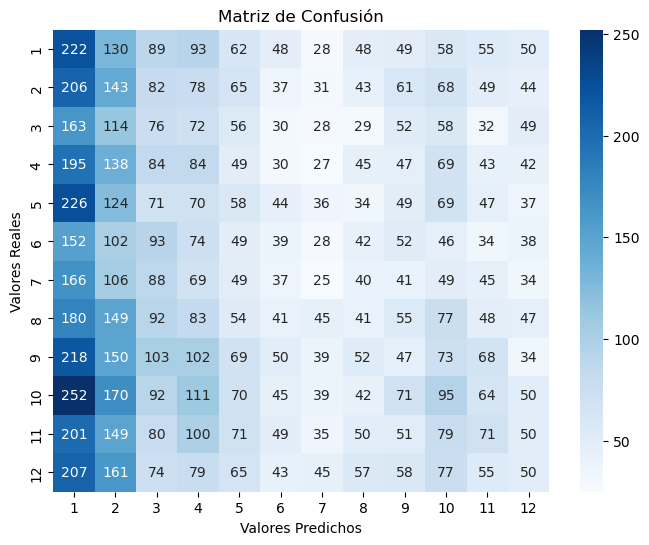

In [38]:
# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear un DataFrame de la matriz de confusión para una mejor visualización con Seaborn
cm_df = pd.DataFrame(cm, index=range(1, 13), columns=range(1, 13))


# Crear una figura de Seaborn
plt.figure(figsize=(8,6))

# Visualizar la matriz de confusión utilizando un mapa de calor de Seaborn
sns.heatmap(cm_df, annot=True, cmap="Blues", fmt="d")

plt.title('Matriz de Confusión')
plt.ylabel('Valores Reales')
plt.xlabel('Valores Predichos')
plt.show()